# reading data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore") 

In [2]:
import os
os.chdir("C:\\Data-Science2\\Snehal_Mane_Project2")

In [3]:
import pandas as pd
A=pd.read_csv("C:\\Users\\SNEHAL\\OneDrive\\Desktop\\CSV files\\training.csv")
B=pd.read_csv("C:\\Users\\SNEHAL\\OneDrive\\Desktop\\CSV files\\testing.csv")
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
A.shape

(614, 13)

In [5]:
B.shape

(367, 12)

In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


# missing data treatment

In [7]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
A.Credit_History.mode()

0    1.0
dtype: float64

In [9]:
B.Credit_History.mode()

0    1.0
dtype: float64

In [10]:
A.Credit_History=A.Credit_History.fillna(1.0)

In [11]:
B.Credit_History=B.Credit_History.fillna(1.0)

In [12]:
from proj_module import replacer
replacer(A)
replacer(B)

In [13]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [15]:
B.Credit_History

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
362    1.0
363    1.0
364    1.0
365    1.0
366    1.0
Name: Credit_History, Length: 367, dtype: float64

# defining X and Y

In [16]:
Y=A[["Loan_Status"]]
X=A.drop(labels=["Loan_ID","Loan_Status"],axis=1)

# EDA

y(cat) & x(con)=Anova/boxplot

y(cat) & x(cat)=ChiSq/Counplot with hue

In [17]:
from proj_module import catconsep
cat,con=catconsep(X)

In [18]:
cat,con

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area'],
 ['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'])

In [19]:
imp_cols = []
from PM8 import ANOVA,chisquare
for i in con:
    q = ANOVA(A,"Loan_Status",i)
    print("Loan_Status vs",i)
    print("Pval: ",q)
    if(q < 0.15):
        imp_cols.append(i)

Loan_Status vs ApplicantIncome
Pval:  0.9025
Loan_Status vs CoapplicantIncome
Pval:  0.1424
Loan_Status vs LoanAmount
Pval:  0.3677
Loan_Status vs Loan_Amount_Term
Pval:  0.604
Loan_Status vs Credit_History
Pval:  0.0


In [20]:
for i in cat:
    q = chisquare(A,"Loan_Status",i)
    print("Loan_Status vs",i)
    print("Pval: ",q)
    if(q < 0.15):
        imp_cols.append(i)

Loan_Status vs Gender
Pval:  0.7391461310869638
Loan_Status vs Married
Pval:  0.029608580862582116
Loan_Status vs Dependents
Pval:  0.3688663081366005
Loan_Status vs Education
Pval:  0.04309962129357355
Loan_Status vs Self_Employed
Pval:  0.9710746411403309
Loan_Status vs Property_Area
Pval:  0.0021360187811644915


In [21]:
imp_cols

['CoapplicantIncome',
 'Credit_History',
 'Married',
 'Education',
 'Property_Area']

# Preprocessing

In [22]:
X.skew()

ApplicantIncome      6.538870
CoapplicantIncome    7.492000
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

In [23]:
from numpy import log
def skew_rem(df,col):
    q=[]
    for i in df[col]:
        if(i != 0):
            q.append(log(i))
        else:
            q.append(i)
    df[col]=q

In [24]:
skew_rem(X,'ApplicantIncome')
skew_rem(X,'CoapplicantIncome')

In [25]:
X.skew()

ApplicantIncome      0.477562
CoapplicantIncome   -0.172920
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

In [26]:
from proj_module import preprocessing
Xnew=preprocessing(X[imp_cols])

In [27]:
Xnew.shape

(614, 9)

In [28]:
Xnew.head()

,CoapplicantIncome,Credit_History,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.107731,0.411733,1,0,1,0,0,0,1
1,0.782215,0.411733,0,1,1,0,1,0,0
2,-1.107731,0.411733,0,1,1,0,0,0,1
3,0.897656,0.411733,0,1,0,1,0,0,1
4,-1.107731,0.411733,1,0,1,0,0,0,1



# train_test split

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Model

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

# create predictions

In [31]:
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

# checking error

In [32]:
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [33]:
tr_acc

0.8065173116089613

In [34]:
ts_acc

0.8211382113821138

# KNN

In [35]:
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)
Xnew = preprocessing(X)

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

In [37]:
k = range(2,10)
tr = []
ts = []
for i in k:
    from sklearn.neighbors import KNeighborsClassifier
    knc = KNeighborsClassifier(n_neighbors=i)
    model = knc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtest)
    pred_ts = model.predict(xtrain)
    from sklearn.metrics import accuracy_score
    ts_acc = accuracy_score(ytest,pred_tr)
    tr_acc = accuracy_score(ytrain,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

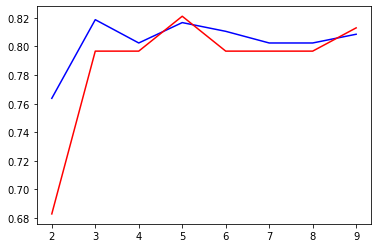

In [38]:
import matplotlib.pyplot as plt
plt.plot(k,tr,c="blue")
plt.plot(k,ts,c="red")

([<matplotlib.axis.XTick at 0x1a865db6fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

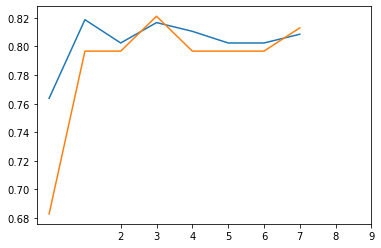

In [39]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)
plt.xticks(range(2,10,1))

# prdict and saving to file

In [40]:
B=pd.read_csv("C:\\Users\\SNEHAL\\OneDrive\\Desktop\\CSV files\\testing.csv")

In [41]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [42]:
X = B.drop(labels=["Loan_ID"],axis=1)
replacer(X)
Xnew = preprocessing(X[imp_cols])
pred = model.predict(Xnew)

In [43]:
B['Loan_Status_Pred']=pred

In [44]:
B.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Pred
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y


In [45]:
Q = B[["Loan_ID"]]

In [46]:
Q['Loan_Status']=pred

In [47]:
Q.to_csv("C:\\Users\\SNEHAL\\OneDrive\\Desktop\\CSV files\\submissions_2.csv")

# 2.Identify customer segments from given data and categorize customer into one of the segments.(Clustering)

a.)what can be amount for the given duration.(Regression)

In [48]:
X = A[["Credit_History","LoanAmount","CoapplicantIncome"]]

In [49]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew = pd.DataFrame(ss.fit_transform(X),columns=["Credit_History","LoanAmount","CoapplicantIncome"])

In [50]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
model = km.fit(Xnew)

In [51]:
X['Cluster'] = model.labels_

In [52]:
q = []
for i in X.Credit_History:
    if(i < 0.5):
        q.append(0)
    else:
        q.append(1)

In [53]:
X.Credit_History = q

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
w = le.fit_transform(A['Loan_Status'])

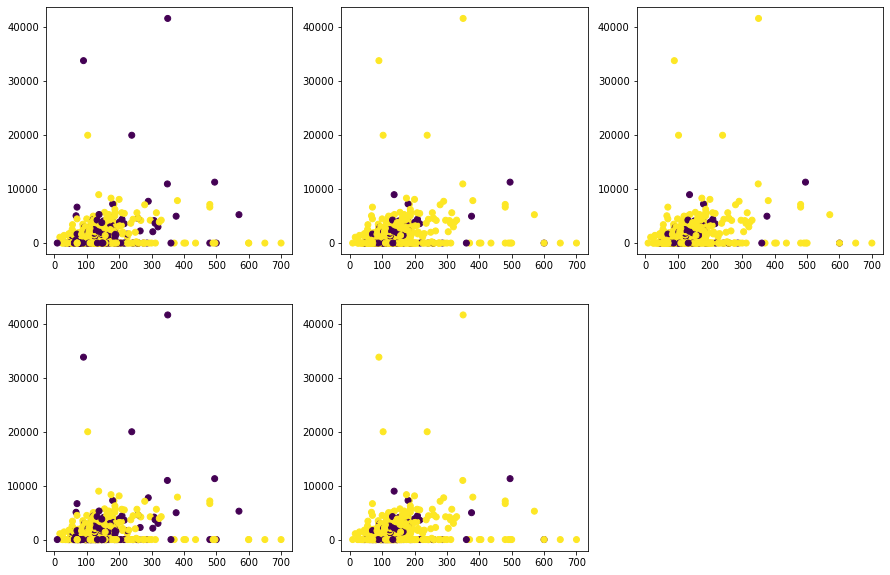

In [55]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=w)
plt.subplot(2,3,2)
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=X.Cluster)
plt.subplot(2,3,3)
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=q)
plt.subplot(2,3,4)
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=w)
plt.subplot(2,3,5)
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=X.Cluster)

# 3.If customer is not eligible for the input required amount and duration:

In [56]:
P1 = A[A.Loan_Status == "Y"]
P2 = B[B.Loan_Status_Pred == "Y"]
P2 = P2.rename({"Loan_Status_Pred":"Loan_Status"},axis=1)
trd = pd.concat([P1,P2])

# Missing Data

In [57]:
replacer(trd)

In [81]:
cat = []
con = []
for i in trd.columns:
    if(trd[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
#cat,con

In [82]:
cat.remove("Loan_ID")
con.remove("LoanAmount")
cat.remove("Loan_Status")

# Defining X & Y

In [83]:
Y = trd[["LoanAmount"]]
X = trd.drop(labels=["LoanAmount","Loan_ID","Loan_Status"],axis=1)

In [84]:
from proj_module import catconsep
cat,con=catconsep(X)

In [85]:
from sklearn.preprocessing import StandardScaler
ss1 = StandardScaler()
X1 = pd.DataFrame(ss1.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
X2.index = range(0,723)
Xnew = X1.join(X2)

In [86]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [87]:
trd.corr()[["LoanAmount"]]

,LoanAmount
ApplicantIncome,0.576951
CoapplicantIncome,0.154097
LoanAmount,1.000000
Loan_Amount_Term,0.063168
Credit_History,-0.083699


# ML Model

In [88]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [94]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)

In [95]:
tr_err

36.40019125549705

In [96]:
ts_err

38.24071756504779

# Prepare Data for making predictions

In [97]:
test = B[B.Loan_Status_Pred == "N"]
test = test.drop(labels=["Loan_Status_Pred","Loan_ID","LoanAmount"],axis=1)

In [98]:
replacer(test)
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [99]:
Xnew.shape

(723, 19)

In [101]:
ss1 = StandardScaler()
X1 = pd.DataFrame(ss1.fit_transform(test[con]),columns=con)
X2 = pd.get_dummies(test[cat])
X2.index = range(0,66)
Xnew = X1.join(X2)

In [103]:
pred = model.predict(Xnew)
pred

array([[132.1447543 ],
       [297.79228649],
       [188.84384449],
       [104.2570986 ],
       [ 92.82739679],
       [116.45599869],
       [148.89045152],
       [ 96.00114702],
       [134.30100802],
       [124.64878009],
       [136.92196771],
       [136.64001966],
       [152.62983936],
       [119.52781765],
       [163.80524183],
       [120.699776  ],
       [ 82.05974874],
       [109.26236577],
       [ 92.47363428],
       [108.35849462],
       [130.48620159],
       [273.98166043],
       [161.73661407],
       [133.36964063],
       [174.30470369],
       [209.11435962],
       [107.04214697],
       [100.83920142],
       [ 74.64026057],
       [ 74.57316115],
       [115.37145838],
       [ 90.90765978],
       [103.5341133 ],
       [147.65084874],
       [111.16034716],
       [153.40521413],
       [120.85038711],
       [158.73902707],
       [172.47531991],
       [141.51477205],
       [406.88888684],
       [ 99.74209624],
       [121.05503174],
       [141

In [104]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Pred
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [105]:
B[B.Loan_Status_Pred == "N"].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Pred
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N
13,LP001094,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban,N
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural,N
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.0,Semiurban,N
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.0,Urban,N


# b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [106]:
test = B[B.Loan_Amount_Term <= 240]
test.index = range(0,34)

In [107]:
replacer(A)
Y = A[["Loan_Amount_Term"]]
X = A.drop(labels=["Loan_Amount_Term","Loan_ID","Loan_Status"],axis=1)
Xnew = preprocessing(X)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [108]:
X.shape

(614, 10)

In [109]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area'],
      dtype='object')

In [112]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)

In [114]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=5,weights="distance")
k = range(2,10)
tr = []
ts = []
for i in k:
    from sklearn.neighbors import KNeighborsClassifier
    knc = KNeighborsClassifier(n_neighbors=i)
    model = knc.fit(xtrain,ytrain)
    pred_tr = model.predict(xtest)
    pred_ts = model.predict(xtrain)
    from sklearn.metrics import accuracy_score
    ts_acc = accuracy_score(ytest,pred_tr)
    tr_acc = accuracy_score(ytrain,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

In [116]:
replacer(test)
X = test.drop(labels=["Loan_Amount_Term","Loan_ID",'Loan_Status_Pred'],axis=1)
Xnew = preprocessing(X)

lm.predict(Xnew)

array([[347.50450335],
       [321.06195715],
       [355.75451989],
       [312.71333571],
       [349.77609344],
       [335.02559174],
       [332.24691899],
       [347.15769596],
       [324.82901753],
       [322.09891631],
       [359.53521602],
       [329.23009623],
       [338.18491459],
       [350.53796222],
       [350.29750467],
       [322.21127582],
       [357.24136891],
       [337.4626689 ],
       [357.09136153],
       [343.24032525],
       [333.66112996],
       [346.06367885],
       [354.07764754],
       [359.24714264],
       [364.02457967],
       [349.82515194],
       [353.82223736],
       [316.84937481],
       [360.23449906],
       [320.6369744 ],
       [336.01751471],
       [314.04695256],
       [321.41119638],
       [348.51091015]])

In [117]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area'],
      dtype='object')

In [118]:
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area'],

SyntaxError: unexpected EOF while parsing (<ipython-input-118-a191a6b1dc76>, line 3)